# **1. READING THE DATA**

In [187]:
!pip install pandas matplotlib

In [188]:
import pandas as pd

ORIGIN = 'https://raw.githubusercontent.com/ivansanchespetrucci/python-pandas/refs/heads/main/base_automoveis.csv'
MODE = 'r'
ENCODING = 'utf-8'
# FORMAT_SPEC_2f = '2f'
SEPARATOR = ','

data = pd.read_csv(filepath_or_buffer=ORIGIN, sep=SEPARATOR, encoding=ENCODING)
data

,montadora,modelo,ano_fabricacao,valor_mercado
0,Ford,Focus,2017,62399.38
1,Volkswagen,Polo,2010,5000.00
2,Chevrolet,Corsa,2017,9944.40
3,Toyota,Yaris,2012,5000.00
4,Chevrolet,Cruze,2018,57020.67
...,...,...,...,...
95,Ford,Fiesta,2007,5000.00
96,Honda,HR-V,2012,5000.00
97,Volkswagen,Jetta,2019,32496.56
98,Chevrolet,Corsa,2022,56143.58


## **1.1. FIRST 3 ROWS**

In [189]:
data.head(n=3)

,montadora,modelo,ano_fabricacao,valor_mercado
0,Ford,Focus,2017,62399.38
1,Volkswagen,Polo,2010,5000.00
2,Chevrolet,Corsa,2017,9944.40


## **1.2. LAST 10 ROWS**

In [190]:
data.tail(n=10)

,montadora,modelo,ano_fabricacao,valor_mercado
90,Toyota,Hilux,2022,42740.59
91,Toyota,Yaris,2018,7154.62
92,Ford,Focus,2022,35918.10
93,Ford,Fiesta,2018,34799.42
94,Volkswagen,Polo,2014,13507.98
95,Ford,Fiesta,2007,5000.00
96,Honda,HR-V,2012,5000.00
97,Volkswagen,Jetta,2019,32496.56
98,Chevrolet,Corsa,2022,56143.58
99,Toyota,RAV4,2009,7970.51


# **2. DATA TYPES**

## **2.1. TYPE FUNCTION**

In [191]:
type(data)

pandas.core.frame.DataFrame

## **2.2. SHAPE FUNCTION**

How many lines and columns we have

In [192]:
# SHow how lines and columns we have
data.shape

(100, 4)

## **2.3. COLUMN NAMES**

In [193]:
data.columns

Index(['montadora', 'modelo', 'ano_fabricacao', 'valor_mercado'], dtype='object')

## **2.4. GENERAL INFORMATION - COLUMNS, TYPES, AND ROWS**

In [194]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 4 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   montadora       100 non-null    object 
 1   modelo          100 non-null    object 
 2   ano_fabricacao  100 non-null    int64  
 3   valor_mercado   97 non-null     float64
dtypes: float64(1), int64(1), object(2)
memory usage: 3.3+ KB


# **3. EXPLORING THE DATA**



In [195]:
# One field => data[field_name]
# Two or more fields => data[[field_name_1, field_name_2]]
data[['montadora', 'modelo']]

,montadora,modelo
0,Ford,Focus
1,Volkswagen,Polo
2,Chevrolet,Corsa
3,Toyota,Yaris
4,Chevrolet,Cruze
...,...,...
95,Ford,Fiesta
96,Honda,HR-V
97,Volkswagen,Jetta
98,Chevrolet,Corsa


# **4. DATA ANALYSIS (EDA)**



## **4.1. AVERAGE VEHICLE VALUES**

In [196]:
data['valor_mercado'].mean()

19798.34556701031

## **4.2. AVERAGE VEHICLE VALUES PER MANUFACTURER**

In [197]:
data.groupby('montadora')['valor_mercado'].mean(numeric_only=True)

montadora
Chevrolet     17031.477895
Ford          20590.348125
Honda         19383.115714
Toyota        19886.930870
Volkswagen    21545.313600
Name: valor_mercado, dtype: float64

## **4.3. AVERAGE VEHICLE VALUES PER MANUFACTURER, ORDERED BY 'valor de mercado' FIELD (DESC ORDER)**

In [198]:
data.groupby('montadora')[['valor_mercado']].mean(numeric_only=True).sort_values(by='valor_mercado',ascending=False)

,valor_mercado
montadora,
Volkswagen,21545.313600
Ford,20590.348125
Toyota,19886.930870
Honda,19383.115714
Chevrolet,17031.477895


## **4.4. PROPORTION OF EACH MANUFACTURER IN OUR FLEET / INVENTORY**

### **4.4.1. PLOT WITH THE DATA**

<Axes: ylabel='montadora'>

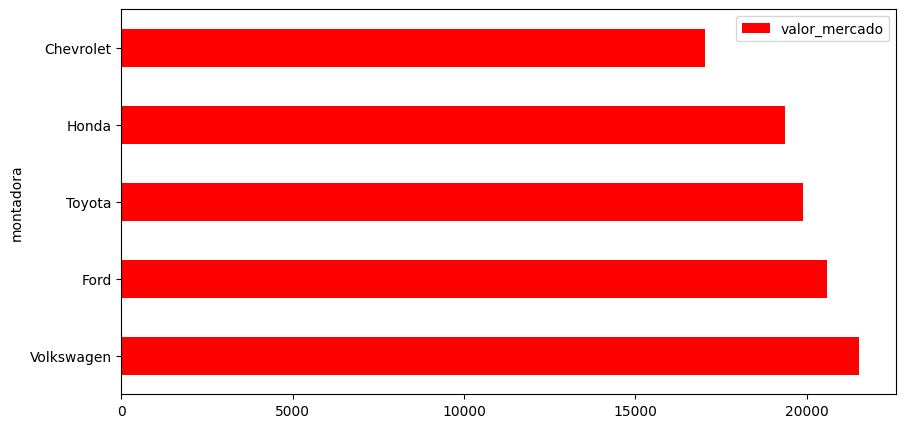

In [199]:
data_manufacturer = data.groupby('montadora')[['valor_mercado']].mean(numeric_only=True).sort_values(by='valor_mercado',ascending=False)
data_manufacturer.plot(kind='barh', figsize=(10,5),color='red')

### **4.4.2 NUMBER OF VEHICLES**

<Axes: ylabel='montadora'>

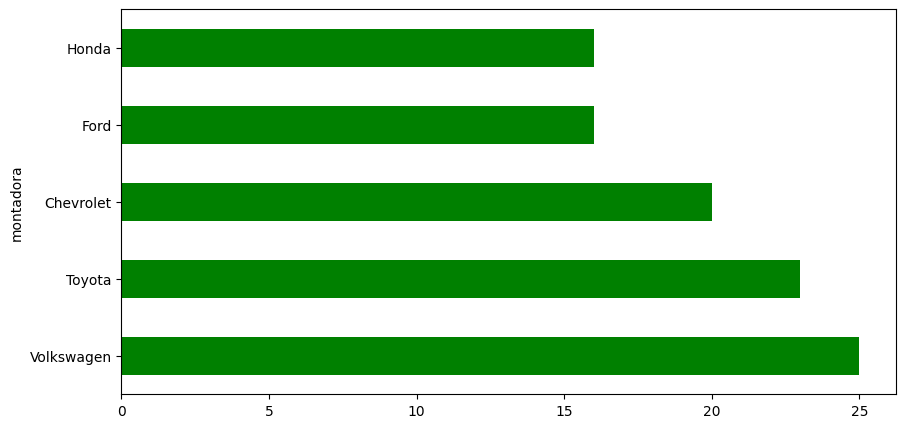

In [200]:
vehicles_qty = data.montadora.value_counts()
vehicles_qty.plot(kind='barh', figsize=(10,5), color='green')

### **4.4.3 PROPORTION**

In [201]:
data.montadora.value_counts(normalize=True)

montadora
Volkswagen    0.25
Toyota        0.23
Chevrolet     0.20
Ford          0.16
Honda         0.16
Name: proportion, dtype: float64

# **5. NULL VALUES**



## **5.1. CHECKING MISSING VALUES**

In [202]:
data.isnull().sum()

montadora         0
modelo            0
ano_fabricacao    0
valor_mercado     3
dtype: int64

## **5.2. HANDLE NULL VALUES**

In [203]:
data = data.fillna(value=0)

## **5.3. CHECKING MISSING VALUES AFTER HANDLE IT**

In [204]:
data.isnull().sum()

montadora         0
modelo            0
ano_fabricacao    0
valor_mercado     0
dtype: int64

# **6. APPLY FILTERS**



## **6.1. FILTERING VEHICLES BY A SPECIFIC MANUFACTURER**



In [205]:
data.montadora.unique()

array(['Ford', 'Volkswagen', 'Chevrolet', 'Toyota', 'Honda'], dtype=object)

In [206]:
data.query(expr='montadora == "Ford" ')

,montadora,modelo,ano_fabricacao,valor_mercado
0,Ford,Focus,2017,62399.38
12,Ford,Ka,2021,36823.04
15,Ford,Focus,2008,5000.00
26,Ford,Ka,2017,24748.14
38,Ford,Ka,2010,5000.00
40,Ford,Fusion,2009,8246.02
45,Ford,Fusion,2006,5000.00
46,Ford,Ka,2019,29725.86
54,Ford,EcoSport,2013,5000.00
65,Ford,Fusion,2011,5000.00


## **6.2. FILTERING VEHICLES BY A LIST OF MANUFACTURERS**

In [207]:
filters = ['Toyota', 'Honda', 'Ford']

### **6.2.1. MANUFACTURERS THAT ARE NOT IN FILTERS**

In [208]:
# SELECT * FROM data WHERE filters NOT IN montadora
data.query(expr='@filters not in montadora')

,montadora,modelo,ano_fabricacao,valor_mercado
1,Volkswagen,Polo,2010,5000.00
2,Chevrolet,Corsa,2017,9944.40
4,Chevrolet,Cruze,2018,57020.67
5,Chevrolet,S10,2010,0.00
7,Chevrolet,Onix,2022,26414.68
8,Chevrolet,S10,2006,5000.00
10,Chevrolet,Prisma,2016,21412.44
11,Volkswagen,Fox,2007,5000.00
13,Chevrolet,Corsa,2016,26774.33
16,Volkswagen,Polo,2007,5000.00


### **6.2.2. MANUFACTURERS THAT ARE IN FILTERS**

#### **6.2.2.1. DISPLAY RESULTS (IN DATAFRAME)**

In [209]:
# SELECT * FROM data WHERE filters IN montadora
data_search = data.query(expr='@filters in montadora')
data_search

,montadora,modelo,ano_fabricacao,valor_mercado
0,Ford,Focus,2017,62399.38
3,Toyota,Yaris,2012,5000.00
6,Honda,WR-V,2014,5000.00
9,Honda,WR-V,2010,5000.00
12,Ford,Ka,2021,36823.04
14,Honda,HR-V,2015,7386.78
15,Ford,Focus,2008,5000.00
17,Toyota,Yaris,2016,11074.95
20,Honda,Fit,2015,5000.00
23,Honda,WR-V,2023,0.00


#### **6.2.2.2. PLOT RESULTS**

<Axes: ylabel='montadora'>

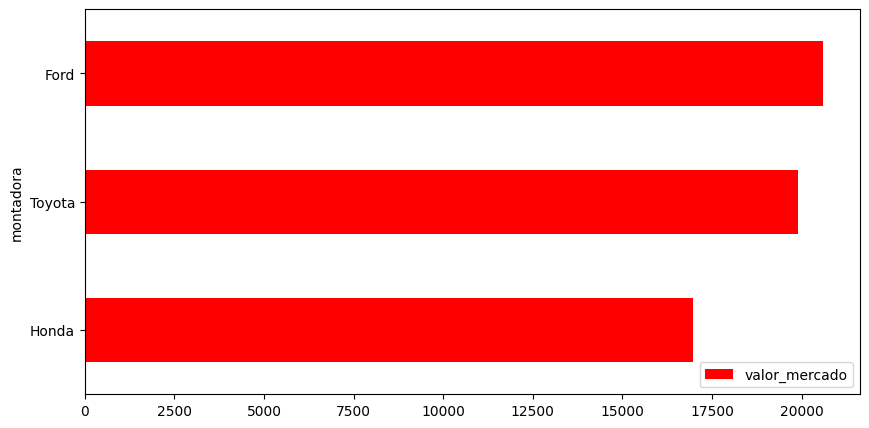

In [210]:
data_spec_manufacturers = data_search.groupby('montadora')[['valor_mercado']].mean().sort_values(by='valor_mercado', ascending=True)
data_spec_manufacturers.plot(kind='barh', figsize=(10,5), color='red')

#### **6.2.2.3. DISPLAY STATISTICS**

In [211]:
data_search.montadora.value_counts(normalize=True)

montadora
Toyota    0.418182
Ford      0.290909
Honda     0.290909
Name: proportion, dtype: float64

## **6.3. VEHICLE STRATIFICATION BY PRODUCTION YEAR AND VALUATION (PRICE)**

### **6.3.1. FILTER 1 - BY YEAR**

In [212]:
data_filter_year = data_search['ano_fabricacao'] > 2020
data_search[data_filter_year]

,montadora,modelo,ano_fabricacao,valor_mercado
12,Ford,Ka,2021,36823.04
23,Honda,WR-V,2023,0.00
25,Toyota,Etios,2022,86044.60
32,Honda,City,2023,45806.62
42,Toyota,Corolla,2022,46634.89
60,Honda,City,2023,74827.34
73,Ford,Fusion,2021,56785.61
78,Toyota,Hilux,2022,94675.89
83,Honda,HR-V,2022,56433.30
87,Toyota,RAV4,2022,24113.48


### **6.3.2. FILTER 2 - BY VALUATION (PRICE)**

In [213]:
data_filter_valuation = data_search['valor_mercado'] >= 30000
data_search[data_filter_valuation]

,montadora,modelo,ano_fabricacao,valor_mercado
0,Ford,Focus,2017,62399.38
12,Ford,Ka,2021,36823.04
25,Toyota,Etios,2022,86044.60
29,Toyota,Hilux,2020,42587.73
32,Honda,City,2023,45806.62
42,Toyota,Corolla,2022,46634.89
60,Honda,City,2023,74827.34
73,Ford,Fusion,2021,56785.61
78,Toyota,Hilux,2022,94675.89
83,Honda,HR-V,2022,56433.30


### **6.2.3. BOTH FILTERS - BY YEAR AND VALUATION (PRICE)**

#### **6.2.3.1. WAY 1**

In [214]:
data_filter_year_valuation = (data_filter_year) & (data_filter_valuation)
data_search[data_filter_year_valuation]

,montadora,modelo,ano_fabricacao,valor_mercado
12,Ford,Ka,2021,36823.04
25,Toyota,Etios,2022,86044.60
32,Honda,City,2023,45806.62
42,Toyota,Corolla,2022,46634.89
60,Honda,City,2023,74827.34
73,Ford,Fusion,2021,56785.61
78,Toyota,Hilux,2022,94675.89
83,Honda,HR-V,2022,56433.30
90,Toyota,Hilux,2022,42740.59
92,Ford,Focus,2022,35918.10


#### **6.2.3.2. WAY 2**

In [215]:
YEAR = 2020
MARKET_VALUE = 30000

select = data_search.query(f'ano_fabricacao > {YEAR} and valor_mercado >= {MARKET_VALUE}')
select

,montadora,modelo,ano_fabricacao,valor_mercado
12,Ford,Ka,2021,36823.04
25,Toyota,Etios,2022,86044.60
32,Honda,City,2023,45806.62
42,Toyota,Corolla,2022,46634.89
60,Honda,City,2023,74827.34
73,Ford,Fusion,2021,56785.61
78,Toyota,Hilux,2022,94675.89
83,Honda,HR-V,2022,56433.30
90,Toyota,Hilux,2022,42740.59
92,Ford,Focus,2022,35918.10


# **7. SAVE THE DATA**



## **7.1. FILE GENERATION**

In [216]:
from pathlib import Path

BASE_DIR = Path.cwd()
RELATIVE_PATH = 'assets/files/vehicle_rental_search.csv'

FILEPATH = BASE_DIR / RELATIVE_PATH
# SEPARATOR = ','
# HEADER = True
INDEX = False
# MODE = 'w'
ENCODING = 'utf-8'

select.to_csv(
    path_or_buf=FILEPATH,
    # sep=SEPARATOR,
    # header=HEADER,
    index=INDEX,
    # mode=MODE,
    encoding=ENCODING
)

## **7.2. READ GENERATED FILE**

In [217]:
from pathlib import Path

BASE_DIR = Path.cwd()
RELATIVE_PATH = 'assets/files/vehicle_rental_search.csv'

FILEPATH = BASE_DIR / RELATIVE_PATH
# SEPARATOR = ','
# HEADER = 'infer'
ENCODING = 'utf-8'
ENCODING_ERRORS = 'strict'

pd.read_csv(
    filepath_or_buffer=FILEPATH,
    # sep=SEPARATOR,
    # header=HEADER,
    encoding=ENCODING,
    encoding_errors=ENCODING_ERRORS
)

,montadora,modelo,ano_fabricacao,valor_mercado
0,Ford,Ka,2021,36823.04
1,Toyota,Etios,2022,86044.60
2,Honda,City,2023,45806.62
3,Toyota,Corolla,2022,46634.89
4,Honda,City,2023,74827.34
5,Ford,Fusion,2021,56785.61
6,Toyota,Hilux,2022,94675.89
7,Honda,HR-V,2022,56433.30
8,Toyota,Hilux,2022,42740.59
9,Ford,Focus,2022,35918.10
